# UNSW-NB15: Data cleaning and preprocessing

## Carregamento das bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
warnings.filterwarnings("ignore")

**NOTA:**
1. Neste dataset há maioritáriamente dois tipos de dados:
    - numéricos
    - categóricos

2. Colunas categóricas: 'proto', 'service', 'state'

3. Colunas binárias, segundo o artigo do dataset:<br>
'is_sm_ips_ports', 'is_ftp_login'

4. Colunas numéricas : 'id', 'dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat',
'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
'ct_dst_src_ltm', 'ct_ftp_cmd', 'ct_flw_http_mthd',
'ct_src_ltm', 'ct_srv_dst'

5. Colunas alvo: 'attack_cat', 'label'

## Carregamento dos ficheiros do dataset

training_set e testing_set standart: <br> 
Conjuntos de treino e teste oficiais da base de dados UNSW-NB15 disponiveis na fonte oficial<br>
Referência: https://research.unsw.edu.au/projects/unsw-nb15-dataset

In [2]:
# Carregar os conjuntos de dados
testing_set = pd.read_csv('UNSW_NB15_training-set.csv')
training_set = pd.read_csv('UNSW_NB15_testing-set.csv')

In [3]:
print('training_set:')
print('Número de AMOSTRAS training_set:', training_set.shape[0])
print('Número de COLUNAS training_set:', training_set.shape[1])
print()
print('Número de amostras rotuladas como NORMAIS no training_set:', training_set[training_set['label'] == 0].shape[0])
print('Número de amostras rotuladas como ATAQUE no training_set:', training_set[training_set['label'] == 1].shape[0])
print('\n')
print('testing_set:')
print('Número de AMOSTRAS testing_set:', testing_set.shape[0])
print('Número de COLUNAS testing_set:', testing_set.shape[1])
print()
print('Número de amostras rotuladas como NORMAIS no testing_set:', testing_set[testing_set['label'] == 0].shape[0])
print('Número de amostras rotuladas como ATAQUE no testing_set:', testing_set[testing_set['label'] == 1].shape[0])

training_set:
Número de AMOSTRAS training_set: 175341
Número de COLUNAS training_set: 45

Número de amostras rotuladas como NORMAIS no training_set: 56000
Número de amostras rotuladas como ATAQUE no training_set: 119341


testing_set:
Número de AMOSTRAS testing_set: 82332
Número de COLUNAS testing_set: 45

Número de amostras rotuladas como NORMAIS no testing_set: 37000
Número de amostras rotuladas como ATAQUE no testing_set: 45332


## Limpeza e Pré-processamento do Dataset

### Remoção de valores nulos no dataset

#### Verificar onde há nulos

training_set e testing_set

In [4]:
training_set.isnull().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [5]:
testing_set.isnull().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

## Informação sobre o dataset

In [6]:
# Verificar se as colunas do treino e teste são iguais:

training_set.columns == testing_set.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [7]:
# Nome das colunas no dataset
training_set.columns

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

## Remoção de colunas menos relevantes segundo a literatura

In [8]:
best_columns = ['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'dload', 'dloss', 'sinpkt', 'dinpkt', 'djit', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'ct_state_ttl', 'ct_dst_src_ltm', 'label', 'attack_cat']

# Restringir as colunas do conjunto de treino
training_set = training_set[best_columns]

# Restringir as colunas do conjunto de teste
testing_set = testing_set[best_columns]

## One-hot encoding

Antes de mais, teremos de reparar a integridade dos dados na coluna 'service'

In [9]:
# Na coluna "service" existem valores com '-', o que deve ser substituido

print(training_set['service'].value_counts())
print()
print(testing_set['service'].value_counts())
print()

-           94168
dns         47294
http        18724
smtp         5058
ftp-data     3995
ftp          3428
ssh          1302
pop3         1105
dhcp           94
snmp           80
ssl            56
irc            25
radius         12
Name: service, dtype: int64

-           47153
dns         21367
http         8287
smtp         1851
ftp          1552
ftp-data     1396
pop3          423
ssh           204
ssl            30
snmp           29
dhcp           26
radius          9
irc             5
Name: service, dtype: int64



In [10]:
# Remover todos os "-" e substitui-los por "None"
training_set['service'] = training_set['service'].apply(lambda x:"none" if x=="-" else x)
testing_set['service'] = testing_set['service'].apply(lambda x:"none" if x=="-" else x)

print(training_set['service'].value_counts())
print()
print(testing_set['service'].value_counts())
print()

none        94168
dns         47294
http        18724
smtp         5058
ftp-data     3995
ftp          3428
ssh          1302
pop3         1105
dhcp           94
snmp           80
ssl            56
irc            25
radius         12
Name: service, dtype: int64

none        47153
dns         21367
http         8287
smtp         1851
ftp          1552
ftp-data     1396
pop3          423
ssh           204
ssl            30
snmp           29
dhcp           26
radius          9
irc             5
Name: service, dtype: int64



training_set e testing_set

In [11]:
# Vamos separar as colunas no dataframe x_train em duas listas: cat_col e num_col.
# A lista cat_col contém os nomes das colunas categóricas ('proto', 'service' e 'state'). 
# Estas colunas contêm variáveis ​​categóricas, o que significa que seus valores são discretos e geralmente representam diferentes categorias ou classes. 

cat_col = ['proto', 'service', 'state']

combined_data = pd.concat([training_set, testing_set])

service_ = OneHotEncoder()
proto_ = OneHotEncoder()
state_ = OneHotEncoder()

ohe_service = service_.fit(combined_data.service.values.reshape(-1, 1))
ohe_proto = proto_.fit(combined_data.proto.values.reshape(-1, 1))
ohe_state = state_.fit(combined_data.state.values.reshape(-1, 1))

# Onehot encoding das colunas necessárias e remover as originais

for col, ohe in zip(['proto', 'service', 'state'], [ohe_proto, ohe_service, ohe_state]):
    x = ohe.transform(training_set[col].values.reshape(-1,1))
    tmp_df = pd.DataFrame(x.todense(), columns=[col+'_'+i for i in ohe.categories_[0]])
    training_set = pd.concat([training_set.drop(col, axis=1), tmp_df], axis=1)

for col, ohe in zip(['proto', 'service', 'state'], [ohe_proto, ohe_service, ohe_state]):
    x = ohe.transform(testing_set[col].values.reshape(-1,1))
    tmp_df = pd.DataFrame(x.todense(), columns=[col+'_'+i for i in ohe.categories_[0]])
    testing_set = pd.concat([testing_set.drop(col, axis=1), tmp_df], axis=1)

In [12]:
training_set.shape, testing_set.shape

((175341, 179), (82332, 179))

### Remoção de tipos de ataques minoritários ['Analysis', 'Backdoor', 'Shellcode', 'Worms'] (menos de 2% do dataset)

In [13]:
# Remoção das amostras indesejadas
attack_labels_to_remove = ['Analysis', 'Backdoor', 'Shellcode', 'Worms']
training_set = training_set.drop(training_set[training_set['attack_cat'].isin(attack_labels_to_remove)].index)
testing_set = testing_set.drop(testing_set[testing_set['attack_cat'].isin(attack_labels_to_remove)].index)

# Verifique o resultado
print(training_set['attack_cat'].value_counts())
print()
print(testing_set['attack_cat'].value_counts())
print()

Normal            56000
Generic           40000
Exploits          33393
Fuzzers           18184
DoS               12264
Reconnaissance    10491
Name: attack_cat, dtype: int64

Normal            37000
Generic           18871
Exploits          11132
Fuzzers            6062
DoS                4089
Reconnaissance     3496
Name: attack_cat, dtype: int64



In [14]:
train = training_set.copy()
test = testing_set.copy()

print(train.head())
print(test.head())

        dur  spkts  dpkts  sbytes  dbytes       rate  sttl  dttl  \
0  0.121478      6      4     258     172  74.087490   252   254   
1  0.649902     14     38     734   42014  78.473372    62   252   
2  1.623129      8     16     364   13186  14.170161    62   252   
3  1.681642     12     12     628     770  13.677108    62   252   
4  0.449454     10      6     534     268  33.373826   254   252   

           dload  dloss  ...  state_CLO  state_CON  state_ECO  state_FIN  \
0    8495.365234      0  ...        0.0        0.0        0.0        1.0   
1  503571.312500     17  ...        0.0        0.0        0.0        1.0   
2   60929.230470      6  ...        0.0        0.0        0.0        1.0   
3    3358.622070      3  ...        0.0        0.0        0.0        1.0   
4    3987.059814      1  ...        0.0        0.0        0.0        1.0   

   state_INT  state_PAR  state_REQ  state_RST  state_URN  state_no  
0        0.0        0.0        0.0        0.0        0.0       0.

In [15]:
# Separa as amostras por 'label'=0 ou 'label'=1
label_0 = train[train['label'] == 0]
label_1 = train[train['label'] == 1]

print('Número de amostras normais:', len(label_0))
print()
print('Número de amostras de ataque:', len(label_1))

Número de amostras normais: 56000

Número de amostras de ataque: 114332


In [16]:
# Baralhar os conjuntos de dados

train = train.sample(frac=1, random_state=42).reset_index(drop=True)
test = test.sample(frac=1, random_state=42).reset_index(drop=True)

In [17]:
# Cálculo das proporções
train_0 = len(label_0) / len(train) * 100
train_1 = len(label_1) / len(train) * 100
test_0 = len(test[test['label'] == 0]) / len(test) * 100
test_1 = len(test[test['label'] == 1]) / len(test) * 100

# Output com as proporções
print("No conjunto de treino há {:.2f}% de classe 0 e {:.2f}% de classe 1".format(train_0, train_1))
print("No conjunto de teste há {:.2f}% de classe 0 e {:.2f}% de classe 1".format(test_0, test_1))

No conjunto de treino há 32.88% de classe 0 e 67.12% de classe 1
No conjunto de teste há 45.88% de classe 0 e 54.12% de classe 1


In [18]:
train['state_CON'].value_counts()

0.0    157247
1.0     13085
Name: state_CON, dtype: int64

## Equilibrio de dados treino

Como podemos ver, a proporção de dados de treino normias e de ataque não é equilibrada. <br>
Assim sendo, iremos aplicar o método SMOTE (Synthetic Minority Over-sampling Technique) de forma a duplicar as amostras de treino normais

In [19]:
# Verificar as colunas binárias no DataFrame
binary_columns = []
for column in train.columns:
    unique_values = train[column].unique()
    if len(unique_values) == 2 and 0 in unique_values and 1 in unique_values:
        binary_columns.append(column)

print(binary_columns)

['label', 'proto_3pc', 'proto_a/n', 'proto_aes-sp3-d', 'proto_any', 'proto_argus', 'proto_aris', 'proto_arp', 'proto_ax.25', 'proto_bbn-rcc', 'proto_bna', 'proto_br-sat-mon', 'proto_cbt', 'proto_cftp', 'proto_chaos', 'proto_compaq-peer', 'proto_cphb', 'proto_cpnx', 'proto_crtp', 'proto_crudp', 'proto_dcn', 'proto_ddp', 'proto_ddx', 'proto_dgp', 'proto_egp', 'proto_eigrp', 'proto_emcon', 'proto_encap', 'proto_etherip', 'proto_fc', 'proto_fire', 'proto_ggp', 'proto_gmtp', 'proto_gre', 'proto_hmp', 'proto_i-nlsp', 'proto_iatp', 'proto_ib', 'proto_icmp', 'proto_idpr', 'proto_idpr-cmtp', 'proto_idrp', 'proto_ifmp', 'proto_igmp', 'proto_igp', 'proto_il', 'proto_ip', 'proto_ipcomp', 'proto_ipcv', 'proto_ipip', 'proto_iplt', 'proto_ipnip', 'proto_ippc', 'proto_ipv6', 'proto_ipv6-frag', 'proto_ipv6-no', 'proto_ipv6-opts', 'proto_ipv6-route', 'proto_ipx-n-ip', 'proto_irtp', 'proto_isis', 'proto_iso-ip', 'proto_iso-tp4', 'proto_kryptolan', 'proto_l2tp', 'proto_larp', 'proto_leaf-1', 'proto_leaf-2

In [20]:
# Mapear os valores da coluna "attack_cat" para números
category_mapping = {
    'Normal': 0,
    'Generic': 1,
    'Exploits': 2,
    'Fuzzers': 3,
    'DoS': 4,
    'Reconnaissance': 5,
    'Analysis': 6,
    'Backdoor': 7,
    'Shellcode': 8,
    'Worms': 9
}

train['attack_cat'] = train['attack_cat'].map(category_mapping)

# Separar as características e os rótulos do conjunto de treinamento
x_train = train.drop('label', axis=1)  # Características
y_train = train['label']  # Rótulos

# Aplicar o SMOTE em ambas as classes
smote = SMOTE()
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# Arredondar os valores nas colunas binárias
binary_columns.remove('label')
x_train_resampled[binary_columns] = np.round(x_train_resampled[binary_columns])

# Junção das amostras originais e sobreamostradas
train = pd.concat([x_train_resampled, y_train_resampled], axis=1)

# Baralhar e reorganizar as amostras resultantes
train = train.sample(frac=1, random_state=42).reset_index(drop=True)

# Mapeamento inverso das categorias de ataque
reverse_category_mapping = {
    0: 'Normal',
    1: 'Generic',
    2: 'Exploits',
    3: 'Fuzzers',
    4: 'DoS',
    5: 'Reconnaissance',
    6: 'Analysis',
    7: 'Backdoor',
    8: 'Shellcode',
    9: 'Worms'
}

# Aplicar o mapeamento inverso para converter os números de volta para as palavras correspondentes
train['attack_cat'] = train['attack_cat'].map(reverse_category_mapping)

# Repetição do cálculo das proporções
train_0 = len(train[train['label'] == 0]) / len(train) * 100
train_1 = len(train[train['label'] == 1]) / len(train) * 100
test_0 = len(test[test['label'] == 0]) / len(test) * 100
test_1 = len(test[test['label'] == 1]) / len(test) * 100

# Output com as proporções
print("No conjunto de treino há {:.2f}% de classe 0 e {:.2f}% de classe 1".format(train_0, train_1))
print("No conjunto de teste há {:.2f}% de classe 0 e {:.2f}% de classe 1".format(test_0, test_1))

No conjunto de treino há 50.00% de classe 0 e 50.00% de classe 1
No conjunto de teste há 45.88% de classe 0 e 54.12% de classe 1


In [21]:
# Separa as amostras por 'label'=0 ou 'label'=1
label_0 = train[train['label'] == 0]
label_1 = train[train['label'] == 1]

print('Número de amostras normais:', len(label_0))
print()
print('Número de amostras de ataque:', len(label_1))

Número de amostras normais: 114332

Número de amostras de ataque: 114332


In [22]:
train['attack_cat'].value_counts()

Normal            114332
Generic            40000
Exploits           33393
Fuzzers            18184
DoS                12264
Reconnaissance     10491
Name: attack_cat, dtype: int64

In [23]:
train['state_CON'].value_counts()

0.0    202740
1.0     25924
Name: state_CON, dtype: int64

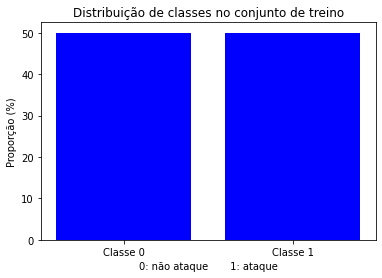

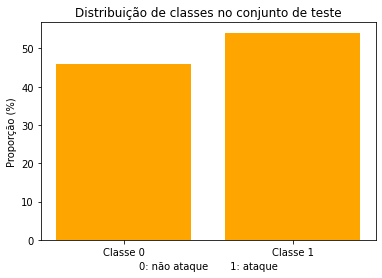

In [71]:
# Cálculo das proporções
train_0 = len(label_0) / len(train) * 100
train_1 = len(label_1) / len(train) * 100
test_0 = len(test[test['label'] == 0]) / len(test) * 100
test_1 = len(test[test['label'] == 1]) / len(test) * 100

# Gráfico de barras para o conjunto de treino
plt.figure()
plt.title("Distribuição de classes no conjunto de treino")
labels = ['Classe 0', 'Classe 1']
train_props = [train_0, train_1]

plt.bar(labels, train_props, color='b')

plt.xlabel("0: não ataque       1: ataque")
plt.ylabel("Proporção (%)")
plt.show()

# Gráfico de barras para o conjunto de teste
plt.figure()
plt.title("Distribuição de classes no conjunto de teste")
test_props = [test_0, test_1]

plt.bar(labels, test_props, color='orange')

plt.xlabel("0: não ataque       1: ataque")
plt.ylabel("Proporção (%)")
plt.show()

In [72]:
train.shape, test.shape

((228664, 179), (80650, 179))

### Reparando os valores das colunas

In [74]:
# Verificanto que tipo de ataques temos:
train['attack_cat'].nunique()

6

In [75]:
train['attack_cat'].value_counts()

Normal            114332
Generic            40000
Exploits           33393
Fuzzers            18184
DoS                12264
Reconnaissance     10491
Name: attack_cat, dtype: int64

In [76]:
train['state_CON'].value_counts()

0.0    203068
1.0     25596
Name: state_CON, dtype: int64

### Reverter o one-hot encoding para realizar o EDA

In [82]:
# train

# Obtendo as colunas geradas pelo one-hot encoding
one_hot_columns = [col for col in train.columns if col.startswith('proto_') or col.startswith('state_') or col.startswith('service_')]

# Criando um novo DataFrame para armazenar as colunas concatenadas
train_EDA = train.copy()

# Criando as colunas 'proto', 'state' e 'service' com os valores concatenados
train_EDA['proto'] = train_EDA[one_hot_columns].apply(
    lambda row: next((col.split('_', 1)[1] for col in one_hot_columns if row[col] == 1), ''), axis=1
)
train_EDA['state'] = train_EDA[one_hot_columns].apply(
    lambda row: next((col.split('_', 1)[1] for col in one_hot_columns if row[col] == 1), ''), axis=1
)
train_EDA['service'] = train_EDA[one_hot_columns].apply(
    lambda row: next((col.split('_', 1)[1] for col in one_hot_columns if row[col] == 1), ''), axis=1
)

# Removendo as colunas geradas pelo one-hot encoding
train_EDA.drop(one_hot_columns, axis=1, inplace=True)

# test

# Obtendo as colunas geradas pelo one-hot encoding
one_hot_columns = [col for col in test.columns if col.startswith('proto_') or col.startswith('state_') or col.startswith('service_')]

# Criando um novo DataFrame para armazenar as colunas concatenadas
test_EDA = test.copy()

# Criando as colunas 'proto', 'state' e 'service' com os valores concatenados
test_EDA['proto'] = test_EDA[one_hot_columns].apply(
    lambda row: next((col.split('_', 1)[1] for col in one_hot_columns if row[col] == 1), ''), axis=1
)
test_EDA['state'] = test_EDA[one_hot_columns].apply(
    lambda row: next((col.split('_', 1)[1] for col in one_hot_columns if row[col] == 1), ''), axis=1
)
test_EDA['service'] = test_EDA[one_hot_columns].apply(
    lambda row: next((col.split('_', 1)[1] for col in one_hot_columns if row[col] == 1), ''), axis=1
)

# Removendo as colunas geradas pelo one-hot encoding
test_EDA.drop(one_hot_columns, axis=1, inplace=True)

# Verificando o DataFrame com as colunas concatenadas
print(train_EDA.head())

        dur  spkts  dpkts  sbytes  dbytes           rate  sttl  dttl  \
0  0.707822     10      8     534     354      24.017337   254   252   
1  0.001153      2      2     132     164    2601.907957    31    29   
2  0.000008      2      0     200       0  125000.000300   254     0   
3  0.000004      2      0     672       0  250000.000600   254     0   
4  1.611537     10      8     930     354      10.548936   254   252   

           dload  dloss  ...    ackdat  smean  dmean  ct_state_ttl  \
0    3503.705566      1  ...  0.058901     53     44             1   
1  568950.562500      0  ...  0.000000     66     82             0   
2       0.000000      0  ...  0.000000    100      0             2   
3       0.000000      0  ...  0.000000    336      0             2   
4    1538.903564      1  ...  0.062276     93     44             1   

   ct_dst_src_ltm  attack_cat  label  proto  state  service  
0               5      Normal      0    tcp    tcp      tcp  
1               3     

In [89]:
train_EDA.isnull().sum()

dur               0
spkts             0
dpkts             0
sbytes            0
dbytes            0
rate              0
sttl              0
dttl              0
dload             0
dloss             0
sinpkt            0
dinpkt            0
djit              0
tcprtt            0
synack            0
ackdat            0
smean             0
dmean             0
ct_state_ttl      0
ct_dst_src_ltm    0
attack_cat        0
label             0
proto             0
state             0
service           0
dtype: int64

## Guardar os dados em disco

In [84]:
train.shape, test.shape, train_EDA.shape, test_EDA.shape

((228664, 179), (80650, 179), (228664, 25), (80650, 25))

In [90]:
# Converter datasets em ficheiros csv

train_EDA.to_csv('./train_alldata_EDA.csv', index=False)
test_EDA.to_csv('./test_alldata_EDA.csv', index=False)
train.to_csv('./train_alldata_preparacao.csv', index=False)
test.to_csv('./test_alldata_preparacao.csv', index=False)